In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
import imp
import sys
sys.path.insert(0,'/home/robin/Projects/INM6/elephant')
sys.path.append('/home/robin/Projects/INM6/python-neo')
# sys.path.insert(0,'/home/robin/Projects/simrest_validation')
sys.path.insert(0,'/home/robin/Projects/NetworkUnit')
sys.path.append('/home/robin/Projects/INM6/Tasks/')
from viziphant.plots.rasterplot import rasterplot
from elephant.spike_train_surrogates import * 
from elephant.statistics import mean_firing_rate, cv, isi
from networkunit import models, tests, scores
from networkunit.plots import alpha
import seaborn as sns
from time import time
from quantities import Hz, ms
from scipy.linalg import eigh
from IPython.core.display import HTML
import urllib2
HTML(urllib2.urlopen('http://bit.ly/1Bf5Hft').read())
rc('text', usetex=True)
sns.set(style='ticks', palette='Set2', context='poster')

In [15]:
class best_test(tests.correlation_dist_test, tests.model2model_test):
    score_type = scores.best_effect_size
    params = {'max_subsamplesize': 100,
              'align_to_0' : True,
              'binsize' : 2 * ms,
              't_start' : 0 * ms,
              't_stop' : 10000 * ms,
              'mcmc_iter' : 110000,
              'mcmc_burn' : 10000,
              'effect_size_type': 'mean'
             }

In [16]:
# A: 2, 3, 4, 5, 6, 7, 8, 9, 10
#cc: 0, .1, .2, .3, .4, .5, .6, .7, .8
es = np.zeros(81)
hdi = [0]*81
size = 100
rate = 10*Hz
tstart = 0*ms
tstop = 10000*ms
binsize = 2*ms
count = 0

In [17]:
for A in [[2],[3],[4],[5],[6],[7],[8],[9],[10]]:
    for cc in [0, .1, .2, .3, .4, .5, .6, .7, .8]:
    
        model_A = models.stochastic_activity(size=size, correlations=0., assembly_sizes=[],
                                        correlation_method='HPP', t_start=tstart, t_stop=tstop,
                                        shuffle=False, name='A')

        model_B = models.stochastic_activity(size=size, correlations=cc, assembly_sizes=A,
                                        correlation_method='CPP', t_start=tstart, t_stop=tstop,
                                        shuffle=False, name='B')

        test = best_test(model_A)
        score = test.judge(model_B)

        print '\n A: ', A, '\t cc: ', cc
        print '\t', score.score
        print '\t', score.HDI
        es[count] = score.score
        hdi[count] = score.HDI
        count = count + 1

 [-----------------100%-----------------] 110000 of 110000 complete in 742.0 sec
 A:  [2] 	 cc:  0
	0.0185163372883
	(-0.022518504558000602, 0.060942098485094652)
 [-----------------100%-----------------] 110000 of 110000 complete in 734.6 sec
 A:  [2] 	 cc:  0.1
	0.00557705366024
	(-0.038769067143311235, 0.049117611419080796)
 [-----------------100%-----------------] 110000 of 110000 complete in 688.6 sec
 A:  [2] 	 cc:  0.2
	-0.0149870356057
	(-0.059304601053256335, 0.030421682104636992)
 [-----------------100%-----------------] 110000 of 110000 complete in 686.2 sec
 A:  [2] 	 cc:  0.3
	0.0149157735094
	(-0.026694839011552455, 0.055611765032277709)
 [-----------------100%-----------------] 110000 of 110000 complete in 699.5 sec
 A:  [2] 	 cc:  0.4
	0.00772241112198
	(-0.05889453437590636, 0.071618076084316237)
 [-----------------100%-----------------] 110000 of 110000 complete in 682.1 sec
 A:  [2] 	 cc:  0.5
	-0.00287315638459
	(-0.045081761247004602, 0.037438223615134575)
 [------

In [18]:
print es
print hdi

[ 0.01851634  0.00557705 -0.01498704  0.01491577  0.00772241 -0.00287316
 -0.00866876  0.00158474 -0.04068304  0.02829476  0.01605601  0.00186227
  0.01172989 -0.00233794  0.00717952  0.01462    -0.05916086 -0.00138629
  0.0408166   0.00277469 -0.03344728  0.01907231  0.00135656 -0.07365918
  0.02332802 -0.03016603 -0.00102653 -0.01349461 -0.02477948 -0.00128382
 -0.02260774 -0.0139201   0.00506467 -0.02298658 -0.0081786   0.02191034
 -0.01883979 -0.0024078  -0.00784581  0.02955171 -0.00605032  0.00532537
 -0.01499069 -0.00410772 -0.05395038 -0.00571277 -0.02747096 -0.00841833
  0.00345341 -0.01295375 -0.02420584 -0.03583311  0.00186645 -0.0050761
 -0.00242359 -0.01554174  0.01274367 -0.02789761 -0.05133134  0.0402275
 -0.02969213 -0.01336489  0.00201146  0.0496246  -0.0501361  -0.02312527
 -0.02373638 -0.00546589 -0.01517354 -0.01740277 -0.002571    0.02113819
 -0.03210954 -0.0363186  -0.037138   -0.01109432  0.00846969  0.01566087
  0.0201155  -0.00165233 -0.00149835]
[(-0.0225185045

In [ ]:
[ 0.01851634,  0.00557705, -0.01498704,  0.01491577,  0.00772241, -0.00287316,
 -0.00866876,  0.00158474, -0.04068304,  0.02829476,  0.01605601,  0.00186227,
  0.01172989, -0.00233794,  0.00717952,  0.01462,    -0.05916086, -0.00138629,
  0.0408166,   0.00277469, -0.03344728,  0.01907231,  0.00135656, -0.07365918,
  0.02332802, -0.03016603, -0.00102653, -0.01349461, -0.02477948, -0.00128382,
 -0.02260774, -0.0139201,   0.00506467, -0.02298658, -0.0081786,   0.02191034,
 -0.01883979, -0.0024078,  -0.00784581, 0.02955171, -0.00605032,  0.00532537,
 -0.01499069, -0.00410772, -0.05395038, -0.00571277, -0.02747096, -0.00841833,
  0.00345341, -0.01295375, -0.02420584, -0.03583311,  0.00186645, -0.0050761,
 -0.00242359, -0.01554174,  0.01274367, -0.02789761, -0.05133134,  0.0402275,
 -0.02969213, -0.01336489,  0.00201146,  0.0496246,  -0.0501361,  -0.02312527,
 -0.02373638, -0.00546589, -0.01517354, -0.01740277, -0.002571,    0.02113819,
 -0.03210954, -0.0363186,  -0.037138,   -0.01109432,  0.00846969,  0.01566087,
  0.0201155,  -0.00165233, -0.00149835]
[(-0.022518504558000602, 0.060942098485094652), (-0.038769067143311235, 0.049117611419080796), (-0.059304601053256335, 0.030421682104636992), (-0.026694839011552455, 0.055611765032277709), (-0.05889453437590636, 0.071618076084316237), (-0.045081761247004602, 0.037438223615134575), (-0.050298275113673095, 0.03218513850917834), (-0.037416183921511713, 0.041831969229583425), (-0.083779901043663965, 0.00093168770301759829), (-0.018944457535934794, 0.072492654791211239), (-0.02655078660143103, 0.058714264541085061), (-0.039817588015996143, 0.041666957591624386), (-0.029538868906133761, 0.051154931516841307), (-0.04315763853693956, 0.037840213876211524), (-0.032555911496393843, 0.046795002454688241), (-0.025684345633934909, 0.055024516154824767), (-0.10285374966834297, -0.01718992957385022), (-0.042194498087924928, 0.038182591725666563), (-0.0030507393886305832, 0.084791821837091289), (-0.036730153414156634, 0.043414901163748576), (-0.088651518835837745, 0.020095390790046661), (-0.024640770333256498, 0.064166729825809621), (-0.039140928130220888, 0.041702634454105089), (-0.12974768784218951, -0.016953972297073967), (-0.018041927441886339, 0.063050854141066454), (-0.076698486537694385, 0.013458010784473673), (-0.042164333154834095, 0.038458288154085932), (-0.054591065492458159, 0.025357802089053905), (-0.078908160280579343, 0.032615169402808356), (-0.044338052408284888, 0.04271933127857163), (-0.066653138452310842, 0.020690847961855642), (-0.058022070945344, 0.030967196960806249), (-0.034449941200937917, 0.046390690831375467), (-0.066785781184163465, 0.021958925897007785), (-0.054676458676457956, 0.037656843003089593), (-0.019032639457706651, 0.063478308694912972), (-0.061381797014391747, 0.023931253577921793), (-0.04389004302129814, 0.036864499464805481), (-0.049834712592524276, 0.032954636934565677), (-0.011796816294153674, 0.071647576433326851), (-0.047303272158746565, 0.036188781195485971), (-0.036268138189782362, 0.0469424642106024), (-0.05657620891234337, 0.0247091207298674), (-0.045096599986130734, 0.034308279626524642), (-0.10781314026977576, 0.0025544499552782565), (-0.046584144702521695, 0.032664995949906121), (-0.071447574055149857, 0.017968538000496404), (-0.048348962391957843, 0.031575853897352263), (-0.037159612683032368, 0.046676528558448754), (-0.054292257687402375, 0.027498386168789069), (-0.072769422840771217, 0.025520908666688605), (-0.077272794077670057, 0.0077859155689898717), (-0.041479198954283654, 0.047541990158294745), (-0.046313733652283653, 0.035625007739971459), (-0.048372173507961629, 0.041860891127136389), (-0.055382538227255342, 0.024639978335809668), (-0.027690583820343059, 0.053358038822289226), (-0.068459436598756224, 0.013954496059069468), (-0.09093763800504201, -0.010600212250806615), (0.0011254409048868151, 0.08092414672324158), (-0.06857241158563751, 0.0095827851036935519), (-0.054363084057841536, 0.027382991657069297), (-0.038518288252884496, 0.041727581618601399), (0.0098061724592509499, 0.089894561578167734), (-0.090003223260652646, -0.0098729218800458294), (-0.062517985920150634, 0.017291446809929122), (-0.065524025464770333, 0.014208978210560236), (-0.046709926779577596, 0.034159660376213492), (-0.056335712873187178, 0.026286039319580113), (-0.059742377222187393, 0.025909996619699279), (-0.042664174784466463, 0.037234637308621227), (-0.023663251031973673, 0.065354522425781283), (-0.073046406622075094, 0.0086704210645062209), (-0.079799815281361541, 0.0064675503558442671), (-0.08080940201395477, 0.0041793599409866659), (-0.051559542013291076, 0.030688452263502905), (-0.031564549936941848, 0.04913829150037017), (-0.032560798804795898, 0.061146233120715994), (-0.022835435753851913, 0.062211298960801825), (-0.044392939278071031, 0.040935037855625508), (-0.042859621021448274, 0.039024584504439658)]

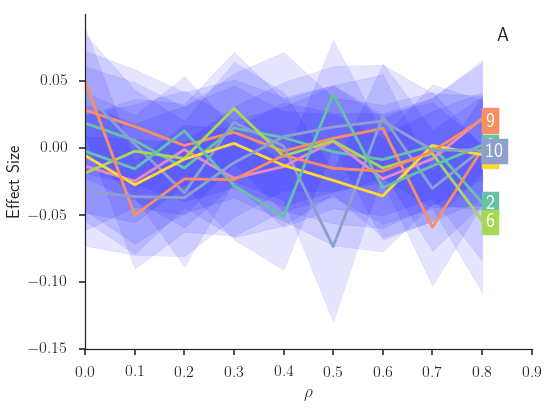

In [33]:
fig, ax = plt.subplots(figsize=(8,6))
rho = [0,.1,.2,.3,.4,.5,.6,.7,.8]
hdi0 = [h[0] for h in hdi]
hdi1 = [h[1] for h in hdi]

for count, A in enumerate([2,3,4,5,6,7,8,9,10]):
    curr_handle, = ax.plot(rho, es[count*9:count*9+9])
    ax.fill_between(rho, hdi0[count*9:count*9+9], 
                    hdi1[count*9:count*9+9], color='b', 
                    alpha=0.1)
    ax.text(0.808, es[count*9+8]-0.005,
                        '{}'.format(A),
                        fontweight='bold',
                        backgroundcolor=curr_handle.get_color(),
                        color='w')

ax.text(.83, 0.08, 'A')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel('Effect Size')
ax.grid()
sns.despine()
# plt.savefig('/home/robin/Sciebo/Documents/Thesis/Figures/es_param_scan.png', bbox_inches='tight')

In [34]:
# A: 2, 3, 4, 5, 6, 7, 8, 9, 10
#cc: .9, 1.
es2 = np.zeros(18)
hdi2 = [0]*18
size = 100
rate = 10*Hz
tstart = 0*ms
tstop = 10000*ms
binsize = 2*ms
count = 0

for A in [[2],[3],[4],[5],[6],[7],[8],[9],[10]]:
    for cc in [.9, 1.]:
    
        model_A = models.stochastic_activity(size=size, correlations=0., assembly_sizes=[],
                                        correlation_method='HPP', t_start=tstart, t_stop=tstop,
                                        shuffle=False, name='A')

        model_B = models.stochastic_activity(size=size, correlations=cc, assembly_sizes=A,
                                        correlation_method='CPP', t_start=tstart, t_stop=tstop,
                                        shuffle=False, name='B')

        test = best_test(model_A)
        score = test.judge(model_B)

        print '\n A: ', A, '\t cc: ', cc
        print '\t', score.score
        print '\t', score.HDI
        es2[count] = score.score
        hdi2[count] = score.HDI
        count = count + 1

 [-----------------100%-----------------] 110000 of 110000 complete in 739.3 sec
 A:  [2] 	 cc:  0.9
	-0.0241602034301
	(-0.080272848914761746, 0.033526074828771013)
 [-----------------100%-----------------] 110000 of 110000 complete in 725.5 sec
 A:  [2] 	 cc:  1.0
	-0.00926521534767
	(-0.049532042733213238, 0.030783605996117805)
 [-----------------100%-----------------] 110000 of 110000 complete in 833.5 sec
 A:  [3] 	 cc:  0.9
	-0.0444069127275
	(-0.10157612404307527, 0.013684753379968715)
 [-----------------100%-----------------] 110000 of 110000 complete in 834.0 sec
 A:  [3] 	 cc:  1.0
	-0.00839956987794
	(-0.048961162899975874, 0.032652660813441467)
 [-----------------100%-----------------] 110000 of 110000 complete in 764.3 sec
 A:  [4] 	 cc:  0.9
	0.0100866386749
	(-0.031507094995337381, 0.050518212116457788)
 [-----------------100%-----------------] 110000 of 110000 complete in 755.7 sec
 A:  [4] 	 cc:  1.0
	0.0170410371455
	(-0.025076973588889204, 0.059984130116992884)
 [---

In [51]:
effect_sizes = [0] * 9
hdi20 = [h[0] for h in hdi2]
hdi21 = [h[1] for h in hdi2]
density_ints0 = [0] * 9
density_ints1 = [0] * 9

for count, A in enumerate([2,3,4,5,6,7,8,9,10]):
    effect_sizes[count] = np.append(es[count*9:count*9],es2[count*2:count*2+2])
    density_ints0[count] = hdi0[count*9:count*9+9] + hdi20[count*2:count*2+2]
    density_ints1[count] = hdi1[count*9:count*9+9] + hdi21[count*2:count*2+2]

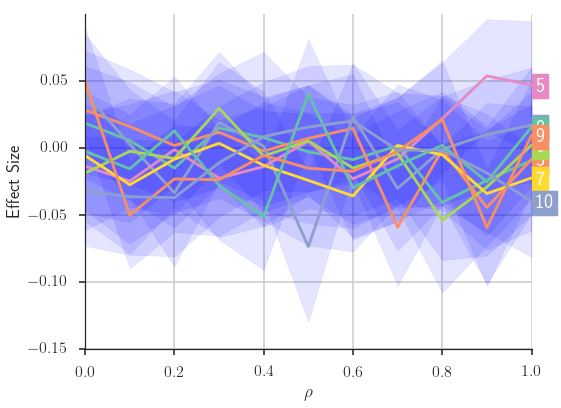

In [58]:
fig, ax = plt.subplots(figsize=(8,6))
rho = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.]

for count, A in enumerate([2,3,4,5,6,7,8,9,10]):
    curr_handle, = ax.plot(rho, effect_sizes[count])
    ax.fill_between(rho, density_ints0[count], 
                    density_ints1[count], color='b', 
                    alpha=0.1)
    ax.text(1.01, effect_sizes[count][-1]-0.005,
                        '{}'.format(A),
                        fontweight='bold',
                        backgroundcolor=curr_handle.get_color(),
                        color='w')

# ax.text(.83, 0.08, 'A')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel('Effect Size')
ax.grid()
sns.despine()
# plt.savefig('/home/robin/Sciebo/Documents/Thesis/Figures/es_param_scan.png', bbox_inches='tight')

## Classic Effect Size Parameter Scan

In [9]:
class best_test(tests.correlation_dist_test, tests.model2model_test):
    score_type = scores.effect_size
    params = {'max_subsamplesize': 100,
              'align_to_0' : True,
              'binsize' : 2 * ms,
              't_start' : 0 * ms,
              't_stop' : 10000 * ms,
              'mcmc_iter' : 110000,
              'mcmc_burn' : 10000,
              'effect_size_type': 'mean'
             }

In [11]:
size = 100
rate = 10*Hz
tstart = 0*ms
tstop = 10000*ms
binsize = 2*ms
count = 0

es = np.zeros((9,11))
es_std = np.zeros((9,11))

for A_count, A in enumerate([[2],[3],[4],[5],[6],[7],[8],[9],[10]]):
    for cc_count, cc in enumerate([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]):
        temp = np.zeros(50)
        for repeat in range(50):
    
            model_A = models.stochastic_activity(size=size, correlations=0., assembly_sizes=[],
                                            correlation_method='HPP', t_start=tstart, t_stop=tstop,
                                            shuffle=False, name='A')

            model_B = models.stochastic_activity(size=size, correlations=cc, assembly_sizes=A,
                                            correlation_method='CPP', t_start=tstart, t_stop=tstop,
                                            shuffle=False, name='B')

            test = best_test(model_A)
            score = test.judge(model_B)
            temp[repeat] = score.score
            
        es[A_count,cc_count] = np.mean(temp)
        es_std[A_count,cc_count] = np.std(temp)
        print '\n A: ', A, '\t cc: ', cc
        print '\t', es[A_count,cc_count], ' +- ', es_std[A_count,cc_count]
        count = count + 1


 A:  [2] 	 cc:  0
	0.0157086433137  +-  0.0141442240917

 A:  [2] 	 cc:  0.1
	0.0137673720207  +-  0.00987851301894

 A:  [2] 	 cc:  0.2
	0.0158203161977  +-  0.0139119757953

 A:  [2] 	 cc:  0.3
	0.0174647438674  +-  0.0113553763659

 A:  [2] 	 cc:  0.4
	0.0173468600979  +-  0.0126872263949

 A:  [2] 	 cc:  0.5
	0.0169384908392  +-  0.00909763443666

 A:  [2] 	 cc:  0.6
	0.018994773867  +-  0.0144191737167

 A:  [2] 	 cc:  0.7
	0.0155498799981  +-  0.0105351136027

 A:  [2] 	 cc:  0.8
	0.0170318226464  +-  0.0127153900562

 A:  [2] 	 cc:  0.9
	0.0172488761105  +-  0.012250013445

 A:  [2] 	 cc:  1
	0.0157798493477  +-  0.0105100199677

 A:  [3] 	 cc:  0
	0.0136153008239  +-  0.0110502175853

 A:  [3] 	 cc:  0.1
	0.0149623249784  +-  0.0115619062152

 A:  [3] 	 cc:  0.2
	0.0156656243239  +-  0.0139562359175

 A:  [3] 	 cc:  0.3
	0.0183653869144  +-  0.0145552523292

 A:  [3] 	 cc:  0.4
	0.0161506020328  +-  0.0109270029257

 A:  [3] 	 cc:  0.5
	0.0215918671135  +-  0.0128380168109

 A

In [13]:
print es
print es_std

[[ 0.01570864  0.01376737  0.01582032  0.01746474  0.01734686  0.01693849
   0.01899477  0.01554988  0.01703182  0.01724888  0.01577985]
 [ 0.0136153   0.01496232  0.01566562  0.01836539  0.0161506   0.02159187
   0.02251847  0.02465726  0.02250578  0.02789612  0.02730384]
 [ 0.01672966  0.01990942  0.02100736  0.02650911  0.03415838  0.03284527
   0.03749883  0.03821281  0.03940791  0.0404014   0.04260496]
 [ 0.01285226  0.02122001  0.03091235  0.03706369  0.04534603  0.04888426
   0.0488161   0.05607191  0.05476642  0.05730241  0.05757024]
 [ 0.01728766  0.02842618  0.0349574   0.05039306  0.05810414  0.06475206
   0.06542205  0.06655001  0.07081151  0.06920196  0.07434209]
 [ 0.01774065  0.02793892  0.05748989  0.06511264  0.07497184  0.07993082
   0.08420256  0.08314685  0.08503311  0.08794561  0.08748881]
 [ 0.0166465   0.04205332  0.07079491  0.08138094  0.08926573  0.09494662
   0.09843059  0.10120595  0.101157    0.10314446  0.10338521]
 [ 0.01628922  0.05867829  0.0768785   0.

In [ ]:
[[ 0.01570864  0.01376737  0.01582032  0.01746474  0.01734686  0.01693849
   0.01899477  0.01554988  0.01703182  0.01724888  0.01577985]
 [ 0.0136153   0.01496232  0.01566562  0.01836539  0.0161506   0.02159187
   0.02251847  0.02465726  0.02250578  0.02789612  0.02730384]
 [ 0.01672966  0.01990942  0.02100736  0.02650911  0.03415838  0.03284527
   0.03749883  0.03821281  0.03940791  0.0404014   0.04260496]
 [ 0.01285226  0.02122001  0.03091235  0.03706369  0.04534603  0.04888426
   0.0488161   0.05607191  0.05476642  0.05730241  0.05757024]
 [ 0.01728766  0.02842618  0.0349574   0.05039306  0.05810414  0.06475206
   0.06542205  0.06655001  0.07081151  0.06920196  0.07434209]
 [ 0.01774065  0.02793892  0.05748989  0.06511264  0.07497184  0.07993082
   0.08420256  0.08314685  0.08503311  0.08794561  0.08748881]
 [ 0.0166465   0.04205332  0.07079491  0.08138094  0.08926573  0.09494662
   0.09843059  0.10120595  0.101157    0.10314446  0.10338521]
 [ 0.01628922  0.05867829  0.0768785   0.0942695   0.10488694  0.11007521
   0.11312115  0.11493052  0.11788545  0.11761962  0.11680524]
 [ 0.01698922  0.0597354   0.09643715  0.11045091  0.11941717  0.12522079
   0.12918769  0.12858633  0.13058477  0.13182427  0.13270817]]
[[ 0.01414422  0.00987851  0.01391198  0.01135538  0.01268723  0.00909763
   0.01441917  0.01053511  0.01271539  0.01225001  0.01051002]
 [ 0.01105022  0.01156191  0.01395624  0.01455525  0.010927    0.01283802
   0.01547975  0.01255968  0.01053538  0.01229243  0.01089358]
 [ 0.01043373  0.01327914  0.0128582   0.0136425   0.014543    0.01323238
   0.01349398  0.01145964  0.01046038  0.01393363  0.00895229]
 [ 0.00943347  0.01502637  0.0142118   0.01597007  0.01719451  0.01597404
   0.01298569  0.01198029  0.01105859  0.00926474  0.0085218 ]
 [ 0.01264213  0.01815831  0.01862592  0.01570655  0.0148412   0.01084915
   0.009387    0.00801245  0.01048978  0.00739009  0.00875938]
 [ 0.01110905  0.01612736  0.0170004   0.01492888  0.01311115  0.01090245
   0.00923986  0.00971046  0.00751386  0.00707429  0.00715252]
 [ 0.01350027  0.01853419  0.01428876  0.01456526  0.01170767  0.01415678
   0.00861832  0.00875005  0.00635857  0.00697741  0.00634208]
 [ 0.01177536  0.0190169   0.01654743  0.01509594  0.01148563  0.00946102
   0.00841814  0.00821741  0.00555724  0.00665825  0.00660928]
 [ 0.01367559  0.02165185  0.0170892   0.01496187  0.011145    0.01189715
   0.00864844  0.00833492  0.00591297  0.00634177  0.00480119]]

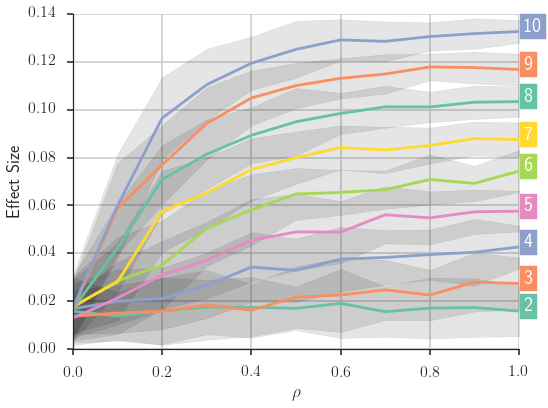

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
rho = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.]

for count, A in enumerate([2,3,4,5,6,7,8,9,10]):
    curr_handle, = ax.plot(rho, es[count])
    ax.fill_between(rho, es[count]-es_std[count], 
                    es[count]+es_std[count], color='k', 
                    alpha=0.1)
    ax.text(1.01, es[count][-1],
                        '{}'.format(A),
                        fontweight='bold',
                        backgroundcolor=curr_handle.get_color(),
                        color='w')

# ax.text(.83, 0.08, 'A')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel('Effect Size')
ax.grid()
sns.despine()
plt.savefig('/home/robin/Sciebo/Documents/Thesis/Figures/CES_param_scan.png', bbox_inches='tight')